<a href="https://colab.research.google.com/github/DavorJordacevic/NEURAL-NETWORKS-/blob/master/Shallow_neural_network_with_Keras_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow_neural_network_with_Keras
# Digits

In [0]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [0]:
X_digits = digits.data
y_digits = digits.target

In [0]:
print(X_digits.shape)
print(y_digits.shape)
print(type(X_digits))
print(type(y_digits))

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)

(1797, 64)
(1797,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(1203, 64)
y_train:	(1203,)
x_test:		(594, 64)
y_test:		(594,)


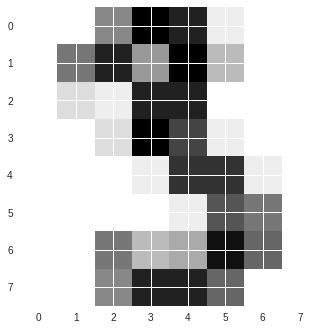

In [0]:
plt.imshow(X_digits[3].reshape((8,8)),cmap=plt.cm.gray_r)

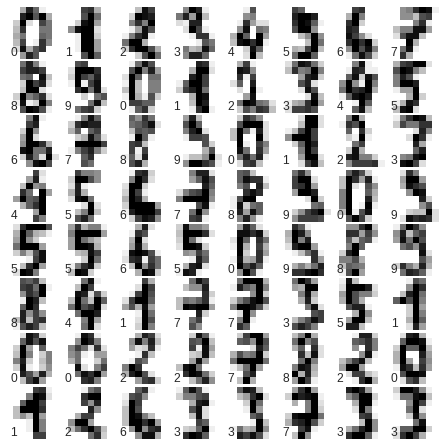

In [0]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# Hyper-parameters
training_epochs = 500 # Total number of training epochs
learning_rate = 0.01 # The learning rate

In [0]:
# create model
def create_model():
  model = Sequential()
  # Input layer
  model.add(Dense(64, input_dim=64, kernel_initializer='normal', activation='tanh'))
  # Output layer
  model.add(Dense(10, activation='softmax'))
 
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
  return model
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 4,810
Trainable params: 4,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
results = model.fit(
 X_train, y_train,
 epochs= training_epochs,
 batch_size = 516,
 validation_data = (X_test, y_test)
)

Train on 1203 samples, validate on 594 samples
Epoch 1/500
1203/1203 [==============================] - 0s 136us/step - loss: 2.1747 - acc: 0.2693 - val_loss: 1.2504 - val_acc: 0.6700
Epoch 2/500
1203/1203 [==============================] - 0s 14us/step - loss: 1.0276 - acc: 0.7722 - val_loss: 0.7085 - val_acc: 0.8333
Epoch 3/500
1203/1203 [==============================] - 0s 13us/step - loss: 0.6270 - acc: 0.8678 - val_loss: 0.4596 - val_acc: 0.8956
Epoch 4/500
1203/1203 [==============================] - 0s 13us/step - loss: 0.4355 - acc: 0.9119 - val_loss: 0.3365 - val_acc: 0.9192
Epoch 5/500
1203/1203 [==============================] - 0s 12us/step - loss: 0.3236 - acc: 0.9318 - val_loss: 0.2835 - val_acc: 0.9293
Epoch 6/500
1203/1203 [==============================] - 0s 12us/step - loss: 0.2566 - acc: 0.9485 - val_loss: 0.2470 - val_acc: 0.9360
Epoch 7/500
1203/1203 [==============================] - 0s 13us/step - loss: 0.2125 - acc: 0.9551 - val_loss: 0.2066 - val_acc: 0.9411


In [0]:
prediction_values = model.predict_classes(X_test)

In [0]:
print(np.mean(results.history["val_acc"]))

0.9771515039602914


In [0]:
# evaluate the model
scores = model.evaluate(X_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1203/1203 [==============================] - 0s 23us/step

acc: 100.00%


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "down right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


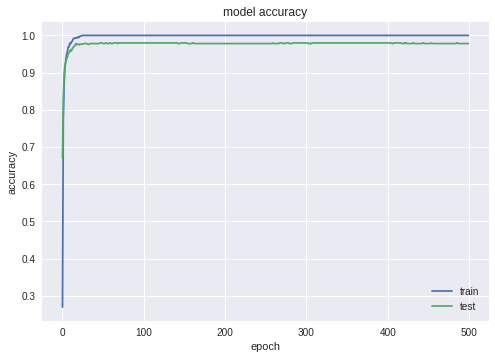

In [0]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

Maximum Loss : 2.1747

Minimum Loss : 0.0002

Loss difference : 2.1746


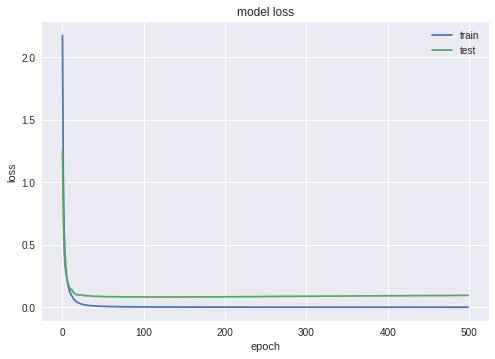

In [0]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

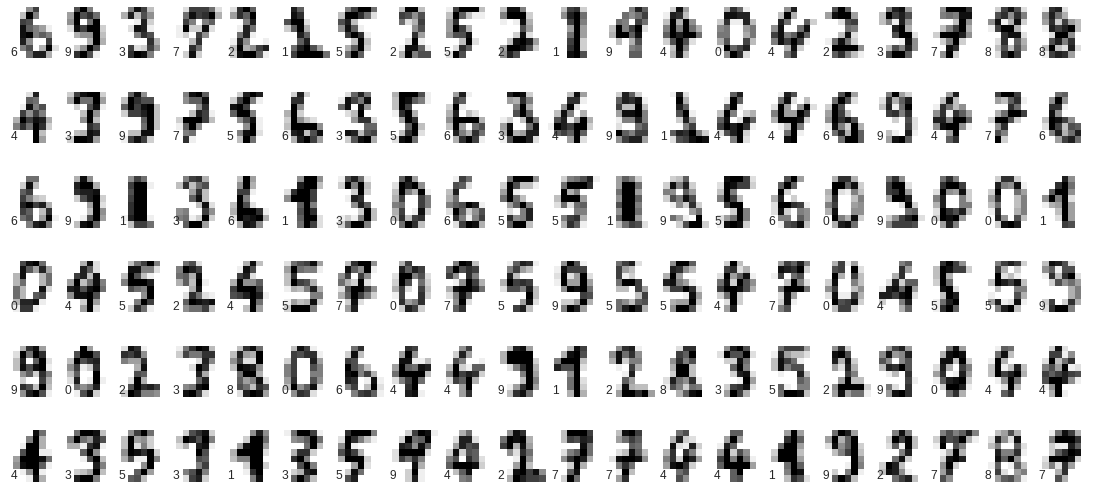

In [0]:
# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((8,8)),cmap=plt.cm.gray_r, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(prediction_values[i]))

In [0]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)


# Output layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nOutput layer weights",weights1.shape,":\n",weights1)
print("Output layer biases",biases1.shape,":\n",biases1)

Input layer weights (64, 64) :
 [[ 0.01431614 -0.01885193 -0.10346138 ... -0.0588891  -0.03797069
   0.05971352]
 [ 0.23963785 -0.09132216 -0.2580519  ...  0.1091152  -0.06141611
   0.00588251]
 [-0.17843233  0.05810577 -0.06633533 ... -0.03589478 -0.12058923
  -0.04382687]
 ...
 [ 0.0214911   0.11237507 -0.14721087 ... -0.05792428  0.09425848
  -0.01934689]
 [ 0.18003383  0.11145942 -0.07863315 ... -0.00563106  0.08906232
   0.09674136]
 [ 0.29966226  0.05967568 -0.13496819 ...  0.01226434  0.07942048
   0.19357792]]
Input layer biases (64,) :
 [ 0.05622994 -0.0557647   0.06644461 -0.03856102  0.00643668 -0.00064653
  0.06027702  0.01481095 -0.02517088 -0.01161336 -0.01946861 -0.02845065
  0.02299573  0.0243297  -0.03020846  0.00194349  0.08102693 -0.06016313
  0.03517434  0.04422421  0.00466877 -0.0307594  -0.01432461 -0.0707083
  0.06043826 -0.00086312 -0.04309223  0.00644336  0.03006952 -0.06918645
  0.01056517 -0.00067342 -0.03472069 -0.02980636  0.00062119  0.00496764
  0.0133581